In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression





In [2]:
from seaborn import regression

In [3]:

sns.set(style="whitegrid")


In [87]:
gold_data = pd.read_csv("C:\\el jabri\DATASET FOR DOLLAR PREDICTION\\final data\\Gold For Dollar Prediction 2000-2022.csv")
inflation_data = pd.read_csv("C:\\el jabri\DATASET FOR DOLLAR PREDICTION\\final data\\INFLATION RATE 2000-2022.csv")
unemployment_rate_data = pd.read_csv("C:\\el jabri\DATASET FOR DOLLAR PREDICTION\\final data\\Unemployment Rate 2000-2022.csv")
brend_oil_data = pd.read_csv("C:\\el jabri\DATASET FOR DOLLAR PREDICTION\\final data\\Brent Oil For Dollar Prediction 2000-2019.csv")
euro_usd_data = pd.read_csv("C:\\el jabri\DATASET FOR DOLLAR PREDICTION\\final data\\EUR_USD Historical Data_2000_2019.csv")



# Display basic information about each dataset


## Gold Data Info

In [5]:
gold_data.head()


,Date,High,Low,Currency
0,01/04/2000,289.5,280.0,USD
1,01/05/2000,285.0,281.0,USD
2,01/06/2000,282.8,280.2,USD
3,01/07/2000,284.5,282.0,USD
4,01/10/2000,283.9,281.8,USD


In [6]:
gold_data.tail()

,Date,High,Low,Currency
5698,8/29/2022,1757.90,1731.40,USD
5699,8/30/2022,1752.80,1732.90,USD
5700,8/31/2022,1738.00,1720.60,USD
5701,09/01/2022,1723.00,1699.10,USD
5702,09/02/2022,1729.45,1707.05,USD


In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703 entries, 0 to 5702
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5703 non-null   object 
 1   High      5703 non-null   float64
 2   Low       5703 non-null   float64
 3   Currency  5703 non-null   object 
dtypes: float64(2), object(2)
memory usage: 178.3+ KB


In [8]:
gold_data.describe()

,High,Low
count,5703.000000,5703.000000
mean,1048.339181,1031.863169
std,522.353946,514.455903
min,259.400000,255.100000
25%,463.900000,457.450000
50%,1198.000000,1179.700000
75%,1392.750000,1368.100000
max,2089.200000,2049.000000


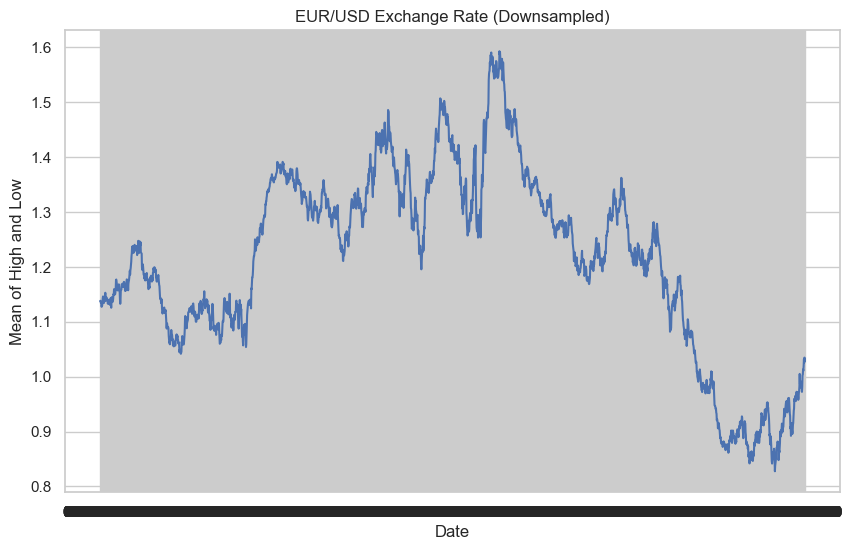

In [ ]:
downsampled_data = gold_data.iloc[::2]

# Calculate the mean of 'High' and 'Low' for each row in the downsampled data
mean_values = downsampled_data[['High', 'Low']].mean(axis=1)

# Downsample the 'Date' to match the number of data points in 'mean_values'
downsampled_dates = downsampled_data['Date']

plt.figure(figsize=(10, 6))
plt.title('Gold For Dollar Predictio')
plt.xlabel('Date')
plt.ylabel('Mean of High and Low')
plt.plot(downsampled_dates, mean_values)

plt.show()

## inflation_data

In [10]:
inflation_data.head()

,Date,INFLATION RATE
0,01/01/2000,3.376857
1,01/01/2001,2.826171
2,01/01/2002,1.586032
3,01/01/2003,2.270095
4,01/01/2004,2.677237


In [11]:
inflation_data.tail()

,Date,INFLATION RATE
18,01/01/2018,2.442583
19,01/01/2019,1.812210
20,01/01/2020,1.233584
21,01/01/2021,4.697859
22,01/01/2022,8.002800


In [12]:
inflation_data.describe()

,INFLATION RATE
count,23.000000
mean,2.493215
std,1.664072
min,-0.355546
25%,1.604127
50%,2.270095
75%,3.191393
max,8.002800


In [13]:
inflation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            23 non-null     object 
 1   INFLATION RATE  23 non-null     float64
dtypes: float64(1), object(1)
memory usage: 500.0+ bytes


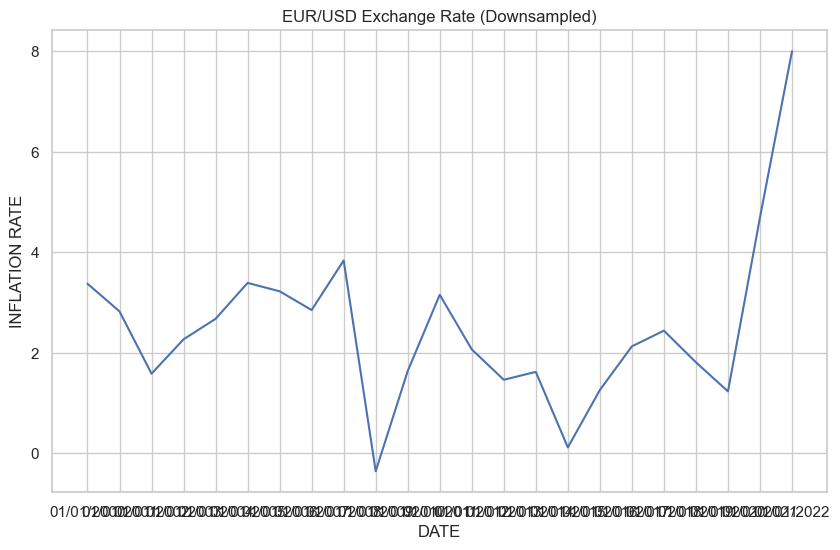

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Inflation rate')
plt.xlabel('DATE')
plt.ylabel('INFLATION RATE')
plt.plot(inflation_data['Date'], inflation_data['INFLATION RATE'])


## unemployment rate

In [15]:
unemployment_rate_data.head()

,Date,UNRATE
0,01/01/2000,4.0
1,01/02/2000,4.1
2,01/03/2000,4.0
3,01/04/2000,3.8
4,01/05/2000,4.0


In [16]:
unemployment_rate_data.tail()

,Date,UNRATE
271,01/08/2022,3.7
272,01/09/2022,3.5
273,01/10/2022,3.7
274,01/11/2022,3.6
275,01/12/2022,3.5


In [17]:
unemployment_rate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    276 non-null    object 
 1   UNRATE  276 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


In [18]:
unemployment_rate_data.describe()

,UNRATE
count,276.000000
mean,5.857971
std,1.959418
min,3.500000
25%,4.400000
50%,5.400000
75%,6.700000
max,14.700000


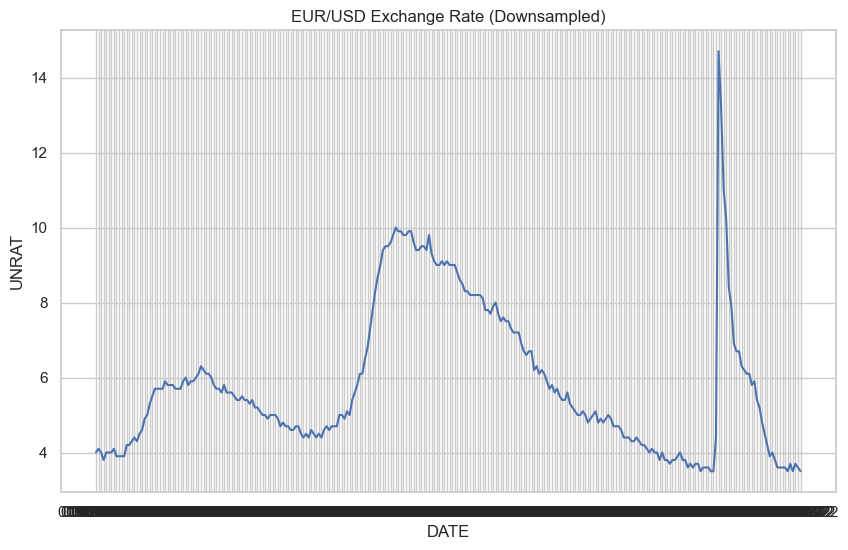

In [19]:
plt.figure(figsize=(10, 6))
plt.title('EUR/USD Exchange Rate (Downsampled)')
plt.xlabel('DATE')
plt.ylabel('UNRAT')
plt.plot(unemployment_rate_data['Date'], unemployment_rate_data['UNRATE'])
plt.show()

## brend oil

In [20]:
brend_oil_data.head()

,Date,High,Low,Change %
0,7/1/2019,66.75,64.22,-2.24%
1,6/28/2019,66.84,66.08,0.00%
2,6/27/2019,66.82,65.63,0.09%
3,6/26/2019,66.85,65.60,2.21%
4,6/25/2019,65.98,64.17,0.29%


In [21]:
brend_oil_data.tail()

,Date,High,Low,Change %
4995,1/10/2000,23.78,23.04,2.77%
4996,1/7/2000,23.98,23.05,-2.24%
4997,1/6/2000,24.22,23.35,-0.46%
4998,1/5/2000,24.37,23.70,-2.71%
4999,1/4/2000,24.70,23.89,-2.75%


In [22]:
brend_oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5000 non-null   object 
 1   High      5000 non-null   float64
 2   Low       5000 non-null   float64
 3   Change %  5000 non-null   object 
dtypes: float64(2), object(2)
memory usage: 156.4+ KB


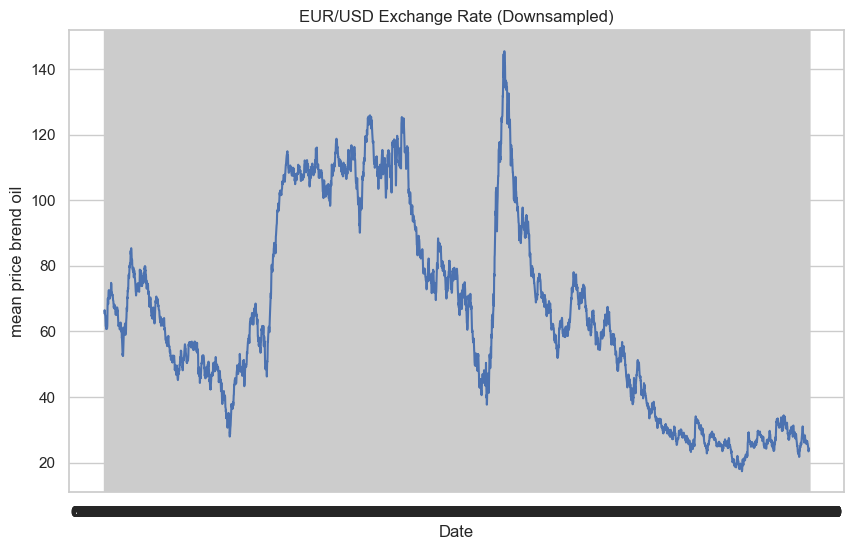

In [23]:

mean_price_brend_oil = brend_oil_data[['High', 'Low']].mean(axis=1)


plt.figure(figsize=(10, 6))
plt.title('EUR/USD Exchange Rate (Downsampled)')
plt.xlabel('Date')
plt.ylabel('mean price brend oil')
plt.plot(brend_oil_data['Date'], mean_price_brend_oil)
plt.show()

## euro usd

In [24]:
euro_usd_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/01/2019,1.1377,1.1372,1.1410,1.1353,NaN,0.05%
1,02/28/2019,1.1371,1.1371,1.1421,1.1357,NaN,0.02%
2,02/27/2019,1.1369,1.1396,1.1404,1.1360,NaN,-0.16%
3,02/26/2019,1.1387,1.1366,1.1404,1.1343,NaN,0.25%
4,02/25/2019,1.1359,1.1338,1.1369,1.1323,NaN,0.14%


In [25]:
euro_usd_data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
4995,01/07/2000,1.0292,1.0327,1.0333,1.0252,NaN,-0.31%
4996,01/06/2000,1.0324,1.0325,1.0419,1.0275,NaN,0.08%
4997,01/05/2000,1.0316,1.0295,1.0404,1.0282,NaN,0.04%
4998,01/04/2000,1.0312,1.0244,1.0347,1.0213,NaN,0.46%
4999,01/03/2000,1.0265,1.0052,1.0282,1.0050,NaN,1.89%


In [26]:
euro_usd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5000 non-null   object 
 1   Price     5000 non-null   float64
 2   Open      5000 non-null   float64
 3   High      5000 non-null   float64
 4   Low       5000 non-null   float64
 5   Vol.      0 non-null      float64
 6   Change %  5000 non-null   object 
dtypes: float64(5), object(2)
memory usage: 273.6+ KB


In [61]:

mean_euro_usd_data = euro_usd_data[['High', 'Low']].mean(axis=1)


plt.figure(figsize=(10, 6))
plt.title('EUR/USD Exchange Rate (Downsampled)')
plt.xlabel('Date')
plt.ylabel('mean euro to usd ')
plt.plot(euro_usd_data['Date'], mean_euro_usd_data)
plt.show()

KeyboardInterrupt: 

# data processing

## infaltion rate


In [88]:
#Shoule execute one time
# Convert the 'DATE' column to a datetime data type with the 'm/d/y' format
inflation_data['Date'] = pd.to_datetime(inflation_data['Date'], format='%m/%d/%Y')

# Set the 'DATE' column as the DataFrame index
inflation_data.set_index('Date', inplace=True)

# Create a date range from the start date (01/01/2000) to the end date (12/31/2022)
date_range = pd.date_range(start='01/01/2000', end='12/31/2022', freq='D')

# Reindex the DataFrame with the date range and fill missing values with forward fill
inflation_data = inflation_data.reindex(date_range, method='ffill')

# Reset the index to make the 'DATE' a regular column
inflation_data.reset_index(inplace=True)

# rename the index column
inflation_data.rename(columns={'index': 'Date'}, inplace=True)

In [89]:
inflation_data

,Date,INFLATION RATE
0,2000-01-01,3.376857
1,2000-01-02,3.376857
2,2000-01-03,3.376857
3,2000-01-04,3.376857
4,2000-01-05,3.376857
...,...,...
8396,2022-12-27,8.002800
8397,2022-12-28,8.002800
8398,2022-12-29,8.002800
8399,2022-12-30,8.002800


## unemployment rate

In [90]:
unemployment_rate_data['Date'] = pd.to_datetime(unemployment_rate_data['Date'], format='%d/%m/%Y')
unemployment_rate_data.set_index('Date', inplace=True)

date_range = pd.date_range(start='01/01/2000', end='12/31/2022', freq='D')

# Reindex the DataFrame with the date range and fill missing values with forward fill
unemployment_rate_data = unemployment_rate_data.reindex(date_range, method='ffill')

# Reset the index to make the 'DATE' a regular column
unemployment_rate_data.reset_index(inplace=True)

# rename the index column
unemployment_rate_data.rename(columns={'index': 'Date'}, inplace=True)




In [91]:
unemployment_rate_data

,Date,UNRATE
0,2000-01-01,4.0
1,2000-01-02,4.0
2,2000-01-03,4.0
3,2000-01-04,4.0
4,2000-01-05,4.0
...,...,...
8396,2022-12-27,3.5
8397,2022-12-28,3.5
8398,2022-12-29,3.5
8399,2022-12-30,3.5


## Gold



In [92]:
## tranform that date
gold_data['Date'] = pd.to_datetime(gold_data['Date'], format='%m/%d/%Y')
## remove the current column 

gold_data['Mean_Price_Gold'] = (gold_data['High'] + gold_data['Low']) / 2

gold_data.drop(columns=['Currency'], inplace=True)
gold_data.drop(columns=['High'], inplace=True)
gold_data.drop(columns=['Low'], inplace=True)

In [93]:
gold_data

,Date,Mean_Price_Gold
0,2000-01-04,284.75
1,2000-01-05,283.00
2,2000-01-06,281.50
3,2000-01-07,283.25
4,2000-01-10,282.85
...,...,...
5698,2022-08-29,1744.65
5699,2022-08-30,1742.85
5700,2022-08-31,1729.30
5701,2022-09-01,1711.05


## brend_oil_data

In [94]:
brend_oil_data['Date'] = pd.to_datetime(brend_oil_data['Date'], format='%m/%d/%Y')

brend_oil_data['Mean_Price_Brend_oil'] = (brend_oil_data['High'] + brend_oil_data['Low']) / 2

brend_oil_data.drop(columns=['Change %'], inplace=True)
brend_oil_data.drop(columns=['High'], inplace=True)
brend_oil_data.drop(columns=['Low'], inplace=True)


In [95]:
brend_oil_data

,Date,Mean_Price_Brend_oil
0,2019-07-01,65.485
1,2019-06-28,66.460
2,2019-06-27,66.225
3,2019-06-26,66.225
4,2019-06-25,65.075
...,...,...
4995,2000-01-10,23.410
4996,2000-01-07,23.515
4997,2000-01-06,23.785
4998,2000-01-05,24.035


## euro usd

In [96]:
euro_usd_data['Date'] = pd.to_datetime(brend_oil_data['Date'], format='%m/%d/%Y')
euro_usd_data.drop(columns=['Open'], inplace=True)
euro_usd_data.drop(columns=['High'], inplace=True)
euro_usd_data.drop(columns=['Low'], inplace=True)
euro_usd_data.drop(columns=['Vol.'], inplace=True)
euro_usd_data.drop(columns=['Change %'], inplace=True)
euro_usd_data.rename(columns={'Price': 'Price of dollar'}, inplace=True)




In [97]:
euro_usd_data

,Date,Price of dollar
0,2019-07-01,1.1377
1,2019-06-28,1.1371
2,2019-06-27,1.1369
3,2019-06-26,1.1387
4,2019-06-25,1.1359
...,...,...
4995,2000-01-10,1.0292
4996,2000-01-07,1.0324
4997,2000-01-06,1.0316
4998,2000-01-05,1.0312


In [98]:
euro_usd_data.tail()

,Date,Price of dollar
4995,2000-01-10,1.0292
4996,2000-01-07,1.0324
4997,2000-01-06,1.0316
4998,2000-01-05,1.0312
4999,2000-01-04,1.0265


## merge the arrays


In [99]:
# data_merge = pd.merge(inflation_data, unemployment_rate_data,gold_data,brend_oil_data, on='Date', how='left')
print(inflation_data.columns)
print(gold_data.columns)
print(unemployment_rate_data.columns)
print(brend_oil_data.columns)

Index(['Date', 'INFLATION RATE'], dtype='object')
Index(['Date', 'Mean_Price_Gold'], dtype='object')
Index(['Date', 'UNRATE'], dtype='object')
Index(['Date', 'Mean_Price_Brend_oil'], dtype='object')


In [100]:
print("Column names in inflation_data:", inflation_data.columns)
print("Column names in unemployment_rate_data:", unemployment_rate_data.columns)
unemployment_rate_data.head()

Column names in inflation_data: Index(['Date', 'INFLATION RATE'], dtype='object')
Column names in unemployment_rate_data: Index(['Date', 'UNRATE'], dtype='object')


,Date,UNRATE
0,2000-01-01,4.0
1,2000-01-02,4.0
2,2000-01-03,4.0
3,2000-01-04,4.0
4,2000-01-05,4.0


In [101]:
data_merge = pd.merge(inflation_data, unemployment_rate_data ,on='Date', how='left')
data_merge = pd.merge(data_merge, gold_data, on='Date', how='left')
data_merge = pd.merge(data_merge, brend_oil_data, on='Date', how='left')
data_merge = pd.merge(data_merge, euro_usd_data, on='Date', how='left')

data_merge.columns


Index(['Date', 'INFLATION RATE', 'UNRATE', 'Mean_Price_Gold',
       'Mean_Price_Brend_oil', 'Price of dollar'],
      dtype='object')

In [102]:
missing_values = data_merge.isnull().sum()
print(missing_values)

Date                       0
INFLATION RATE             0
UNRATE                     0
Mean_Price_Gold         2698
Mean_Price_Brend_oil    3401
Price of dollar         3401
dtype: int64


In [103]:
# Drop rows with NaN values from the DataFrame
data_merge.dropna(inplace=True)


In [104]:
# Check for missing values in the merged_data DataFrame
missing_values = data_merge.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

Date                    0
INFLATION RATE          0
UNRATE                  0
Mean_Price_Gold         0
Mean_Price_Brend_oil    0
Price of dollar         0
dtype: int64


In [105]:
data_merge.shape

(4876, 6)

In [106]:
data_merge.head()

,Date,INFLATION RATE,UNRATE,Mean_Price_Gold,Mean_Price_Brend_oil,Price of dollar
3,2000-01-04,3.376857,4.0,284.75,24.295,1.0265
4,2000-01-05,3.376857,4.0,283.00,24.035,1.0312
5,2000-01-06,3.376857,4.0,281.50,23.785,1.0316
6,2000-01-07,3.376857,4.0,283.25,23.515,1.0324
9,2000-01-10,3.376857,4.0,282.85,23.410,1.0292


In [107]:
data_merge.tail()

,Date,INFLATION RATE,UNRATE,Mean_Price_Gold,Mean_Price_Brend_oil,Price of dollar
7115,2019-06-25,1.81221,3.6,1429.00,65.075,1.1359
7116,2019-06-26,1.81221,3.6,1416.45,66.225,1.1387
7117,2019-06-27,1.81221,3.6,1408.35,66.225,1.1369
7118,2019-06-28,1.81221,3.6,1418.20,66.460,1.1371
7121,2019-07-01,1.81221,3.7,1393.30,65.485,1.1377


In [108]:
file_path = 'C:\\el jabri\DATASET FOR DOLLAR PREDICTION\\final data\\file_name.csv'

# Save the DataFrame as a CSV file
data_merge.to_csv(file_path, index=False)

## Split the dataset into training, cross validation, and test sets


In [111]:
data_merge.columns

Index(['Date', 'INFLATION RATE', 'UNRATE', 'Mean_Price_Gold',
       'Mean_Price_Brend_oil', 'Price of dollar'],
      dtype='object')

In [112]:
columns_first_table = ['INFLATION RATE', 'UNRATE', 'Mean_Price_Gold', 'Mean_Price_Brend_oil']
columns_second_table = ['Price of dollar']

# Create the first table with selected columns
X = data_merge[columns_first_table]

# Create the second table with selected columns
Y = data_merge[columns_second_table]

In [116]:
print(f"the shape of the inputs x is: {X.shape}")
print(f"the shape of the targets y is: {Y.shape}")

the shape of the inputs x is: (4876, 4)
the shape of the targets y is: (4876, 1)


In [117]:
# Display the first 5 lines of x
print("First 5 lines of X:")
print(X[:5])

# Display the first 5 lines of y
print("First 5 lines of Y:")
print(Y[:5])

First 5 lines of X:
   INFLATION RATE  UNRATE  Mean_Price_Gold  Mean_Price_Brend_oil
3        3.376857     4.0           284.75                24.295
4        3.376857     4.0           283.00                24.035
5        3.376857     4.0           281.50                23.785
6        3.376857     4.0           283.25                23.515
9        3.376857     4.0           282.85                23.410
First 5 lines of Y:
   Price of dollar
3           1.0265
4           1.0312
5           1.0316
6           1.0324
9           1.0292


##  Split the dataset into training, cross validation, and test sets


In [121]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(X, X, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")


the shape of the training set (input) is: (2925, 4)
the shape of the training set (target) is: (2925, 4)

the shape of the cross validation set (input) is: (975, 4)
the shape of the cross validation set (target) is: (975, 4)

the shape of the test set (input) is: (976, 4)
the shape of the test set (target) is: (976, 4)


### Feature scaling


In [124]:
# Initialize the StandardScaler
scaler_linear = StandardScaler()

# Fit the scaler to the training data and transform it
x_train_scaled = scaler_linear.fit_transform(x_train)

In [142]:
linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)

LinearRegression()

In [149]:
# Use scikit-learn's utility function and divide by 2
yhat = linear_model.predict(x_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")





training MSE (using sklearn function): 6.669987191854766e-27


In [150]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_scaled = scaler_linear.transform(x_cv)

predictions = linear_model.predict(x_test)
mae = mean_squared_error(y_test, predictions)/2
print(mae)

27592121852.470703


c:\Users\UCA\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
